<a href="https://colab.research.google.com/github/hewp84/tinyml/blob/main/2_1_TinymlParadigm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Shift of Machine Learning

##Learning Goal
You will be able to apply the Machine Learning paradigm to train a model

You will be able to evaluate the loss function in a trained model

You will be able to contrast between underfitted, overfitted, and well-fitted trained models

Machine learning figures things out on its own. Compare the traditional programming paradigm to the machine learning paradigm below.

![picture](https://drive.google.com/uc?id=1-suVpteJGitubqtsnSe0Cq8mUb5v7qvq)
<font size='1'>Figure 1: TP vs ML paradigm<sup>1</sup></font>

For a Machine Learning algorithm to solve a problem, there are two key features. (1) it will take a piece of **data** and (2) will take a **guess** at the **answer**. Then, it will *optimize* its **guess** until it gets the correct **answer**. The concept of *loss* will be what helps to *optimize* the **guess**. 

To illustrate, the below diagram shows the general machine learning process.

<img src="https://drive.google.com/uc?id=1024NYwnl_LIHRl5YbdsL-ZAjxcmAFybu" width="825" height="325"/>
<br><font size='1'>Figure 2: ML paradigm process<sup>1</sup></font>


### Simulating a Machine Learning model to understand *loss*

Here we will iterate through, by trial and error, different **rules** (the "output" or "result" in the ML paradigm) to understand why machine learning is so powerful, and principly lies on the concept of **loss**<br>
<br>
We are given a set of **data** in the form of **x** values that we will work with. And, a set of answers (**y** values) that correspond to the data.


In [ ]:
x = [-1, 0, 1, 2, 3, 4]                    # input values
y = [-3, -1, 1, 3, 5, 7]                   # output, or, "answer" values

For any piece of **data** (**x**-value, input), we should be able to figure out the **answer**. <br>

#### Guessing the rule ourselves
We need a **rule** (the function that will provide the answer for the given input). For our simple example, this rule will be a linear function in the form of **y=mx+b**.

Shown below is a slider to adjust different 'm' and 'b' values so that we can demonstrate how good or bad rules are at predicting (drawing inferences) about the answer.

By default, m = 3 and b = -1. <br>

#### The graph below illustrates loss
The <font color="green"> green </font> line shows the real and accurate values that correlate our **x** to our **y**. The <font color="red"> red </font> line shows the values that are predicted based on our rule that is defined by our slider. The **loss** is visualized by the space between the two lines.
<br>

Run the cell below and then play around by changing the **m** value on the slider and the graph will update automatically.

The predicted Y is: [-1, 1, 3, 5, 7, 9]

The loss for this guess is: 4.898979485566356


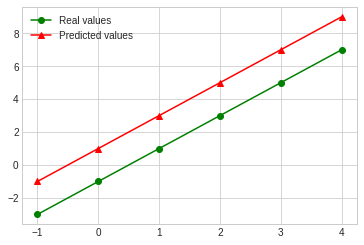

In [ ]:
#@title Change the values to explore how loss changes {display-mode:"form", run:"auto"}

m = 2       #@param {type:"slider", min:-25, max:25, step:1}
b = 1       #@param {type:"slider", min:-25, max:25, step:1}

import math

%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('seaborn-whitegrid')
import numpy as np

# the following calculates e
guessY = []
for iX in x:
  iY = (m*iX) + b
  guessY.append(iY)

total_square_error = 0
for i in range(0, len(y)):
  square_error = (y[i] - guessY[i]) ** 2
  total_square_error += square_error

print("The predicted Y is: " + str(guessY) + "\n")
print("The loss for this guess is: " + str(math.sqrt(total_square_error)))

fig, ax = plot.subplots()
ax.plot(x, y, marker='o', color='green', label='Real values')
ax.plot(x, guessY, marker='^', color='red', label='Predicted values')
leg = ax.legend()
ax.legend(loc='upper left')

total_square_error = 0


#### The Reality

This is a very trivial process. It is not too hard to find that m=2 and b=-1 (y = 2x-1) is the correct rule to match the **x** values to the **y** values. 

<br>

However, with more complex data, figuring out those values for the rule is not so easy. Machine learning helps us out. By taking a guess, measuring our accuracy, and optimizing our guess *again* and *again*, <font color='red'>we can produce a **model** that will provide accurate **inferences** from any **data**. </font>

<img src="https://drive.google.com/uc?id=103DzWjmdOgRtutiXVOtxZMEIl_0Oiy84" width="490" height="159"/> <br>
<font size='1'>Figure 3: A "model"<sup>1</sup></font>

### Machine Learning

Instead of simulating the machine learning process as we did above, now we will let the machine do the guessing, measuring, optimizing, and *learning*.

The following block of code defines a simple neural network that will utilize the same **x** and **y** value. Each **epoch** that it lists is a **guess** that it took. For each epoch it calculates the **loss** and shows that as well. On each new guess that the ML algorithm takes, it tries to further minimize loss down to 0.

In [ ]:


import tensorflow as tf
import numpy as np
from tensorflow import keras

from google.colab.output import eval_js
eval_js('google.colab.output.setIframeHeight("270")')

# define a neural network with one neuron
# for more information on TF functions see: https://www.tensorflow.org/api_docs
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

# use stochastic gradient descent for optimization and
# the mean squared error loss function
model.compile(optimizer='sgd', loss='mean_squared_error')

# define some training data (xs as inputs and ys as outputs)
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

# fit the model to the data (aka train the model)
#@title ####Enter the number of epochs to train the model on and explore how the final loss value changes {run: "auto"}
#@markdown ----
#@markdown <br>
Epochs = 500 #@param [10, 25, 50, 100, 500] {type: "raw"}

history = model.fit(xs, ys, epochs=int(Epochs))

#code for the loss graph
train_loss = history.history['loss']
#plots the x value from 0 to the # of epochs, loss values on the y-axis
plot.plot((range(0, Epochs)), train_loss, 'g', label='Training loss')
plot.xlabel('Epochs')
plot.ylabel('Loss')
plot.legend()

Epoch 1/500
1/1 [==============================] - 0s 255ms/step - loss: 7.7980
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 6.3312
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 5.1732
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 4.2581
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 3.5343
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 2.9611
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 2.5064
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 2.1451
Epoch 9/500
1/1 [==============================] - 0s 11ms/step - loss: 1.8572
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 1.6273
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 1.4429
Epoch 12/500
1/1 [==============================] - 0s 7ms/step - loss: 1.2946
Epoch 13/500
1/1 [==============================] - 0s 9ms

NameError: ignored

Below is a screenshot from the above code to demonstrate where a model is fit. Given a set of data, if there are too few **iterations** (epochs) of the training algorithm, the model will be **underfit** while if there are too many, the model is **overfit**.

<img src="https://drive.google.com/uc?id=103kynKaai_d2fiC2543aUk0F9pvN4JtB" width="480" height="333"/> <br>
<font size='1'>Figure 4: Model Fitness<sup>2</sup></font>

**Underfiting** our model will be detrimental because it will not make accurate inferences on **any** data. <br> </br>
**Overfitting** is also detrimental because the inferences will be **too good**. Meaning, given the data we provide, it will perform very well. But, when we apply our model to other data (real-world data), it will make **poor inferences**. Our model will be so highly tuned to *only* the data we gave.

Above, there is a graph that charts how the ML minmized loss over time. 

Machine Learning took a **guess** at what the **rule** should be, then using **loss**, it was able to measure its **accuracy**. Depending on how accurate the guess was, it **optimized** its rule to make more guesses and bring the loss as close to zero **as possible**.

### Resultingly
a **model** was created. We went through the process of training the model, and now it will use its defined set of **rules** (that it learned) to take input and **produce an inference**, or, a best answer that fits the input data.

Lets go a try to model more complex data sets in the [next page](Simple_Model.ipynb)

<br> </br>
<br> </br>
**References** <br>
1: https://github.com/tinyMLx/courseware/blob/master/edX/slides/2-1-1.pdf <br>
2: https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/
